<a href="https://colab.research.google.com/github/HarshTiwari0722/Prodigy-ML-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating synthetic house data...

Dataset Info:
Shape: (1000, 4)

First 5 rows:
          sqft  bedrooms  bathrooms          price
0  2397.371322         2        1.5  314517.051320
1  1889.388559         2        1.0  270008.719395
2  2518.150830         3        1.0  385180.073568
3  3218.423885         4        2.0  449913.305028
4  1812.677300         1        3.0  209607.458376

Dataset Statistics:
              sqft     bedrooms    bathrooms          price
count  1000.000000  1000.000000  1000.000000    1000.000000
mean   2021.625912     2.956000     2.215500  304841.334386
std     768.732158     1.035923     0.802779   97030.426024
min     500.000000     1.000000     1.000000   75130.469907
25%    1481.927756     2.000000     2.000000  237825.731083
50%    2020.240490     3.000000     2.000000  307732.860379
75%    2518.355100     4.000000     2.500000  370426.559780
max    5000.000000     5.000000     4.000000  608593.841663


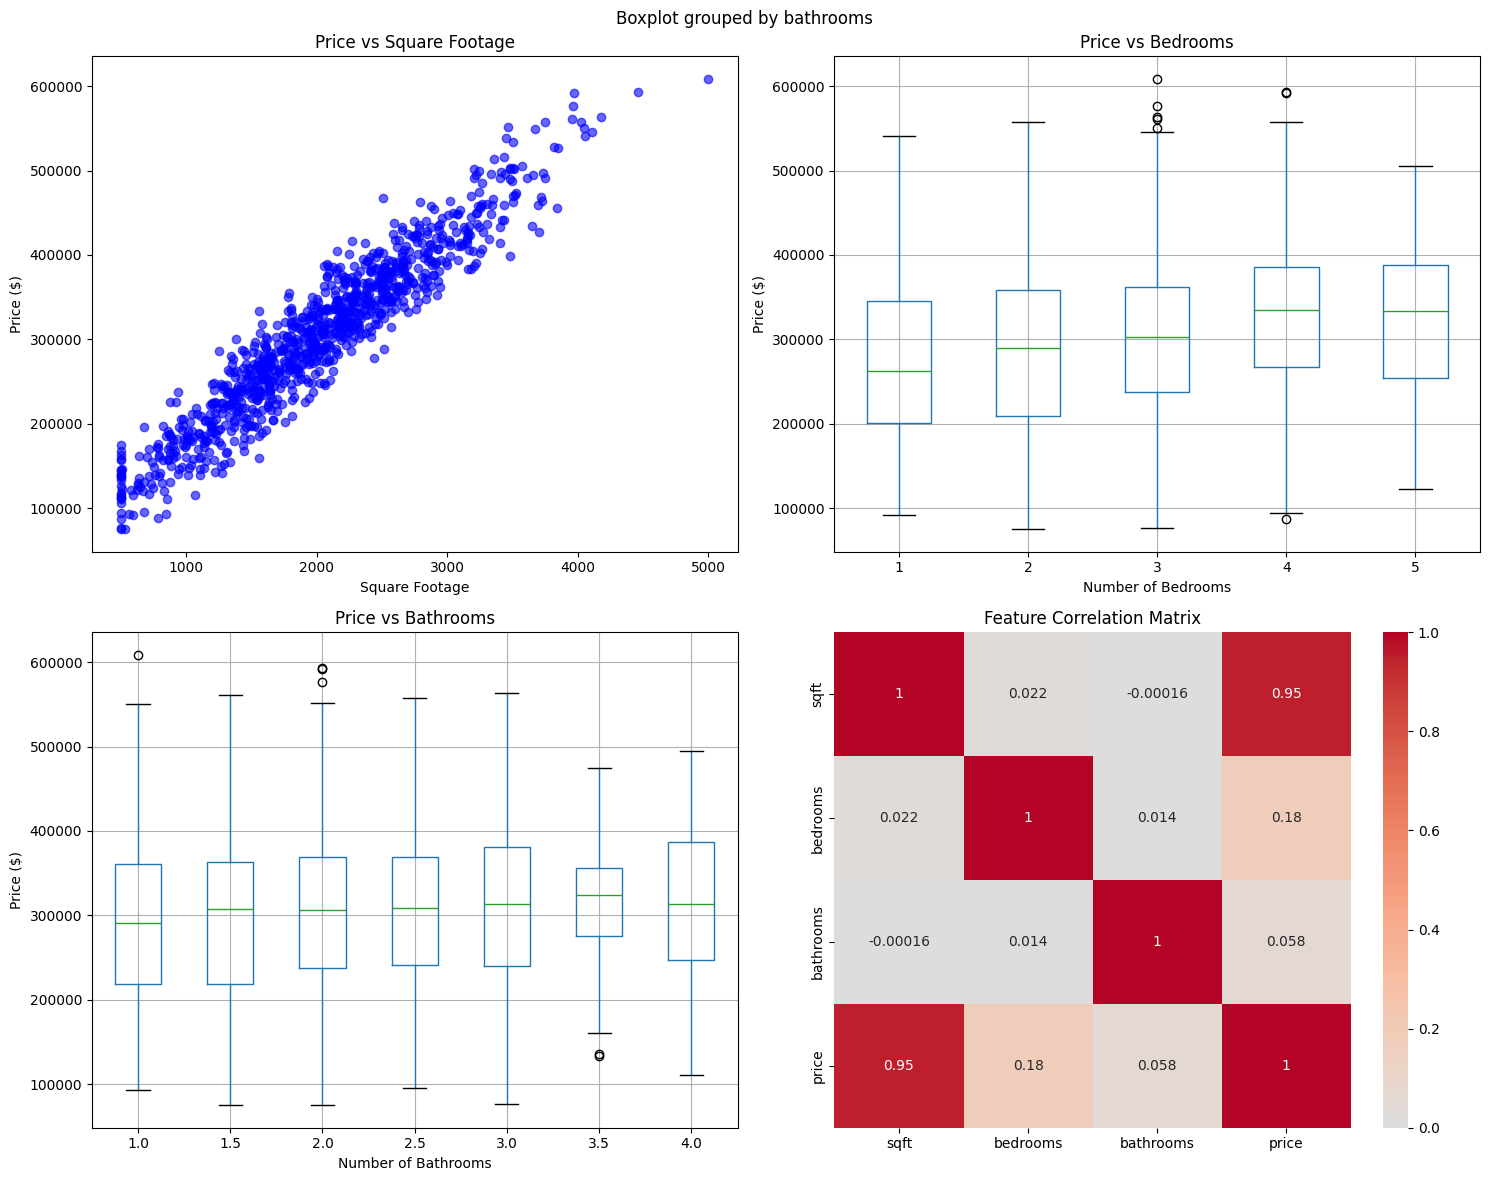


Feature matrix shape: (1000, 3)
Target vector shape: (1000,)

Training set size: 800 samples
Testing set size: 200 samples

Model trained successfully!

MODEL EVALUATION RESULTS

Training Set Performance:
  Mean Squared Error (MSE): $647,859,780.81
  Root Mean Squared Error (RMSE): $25,453.09
  Mean Absolute Error (MAE): $20,486.16
  R² Score: 0.9316

Test Set Performance:
  Mean Squared Error (MSE): $700,121,547.21
  Root Mean Squared Error (RMSE): $26,459.81
  Mean Absolute Error (MAE): $21,402.68
  R² Score: 0.9234

Model Coefficients:
  Square Footage: $119.94
  Bedrooms: $14,630.24
  Bathrooms: $6,521.93
  Intercept: $4,208.25


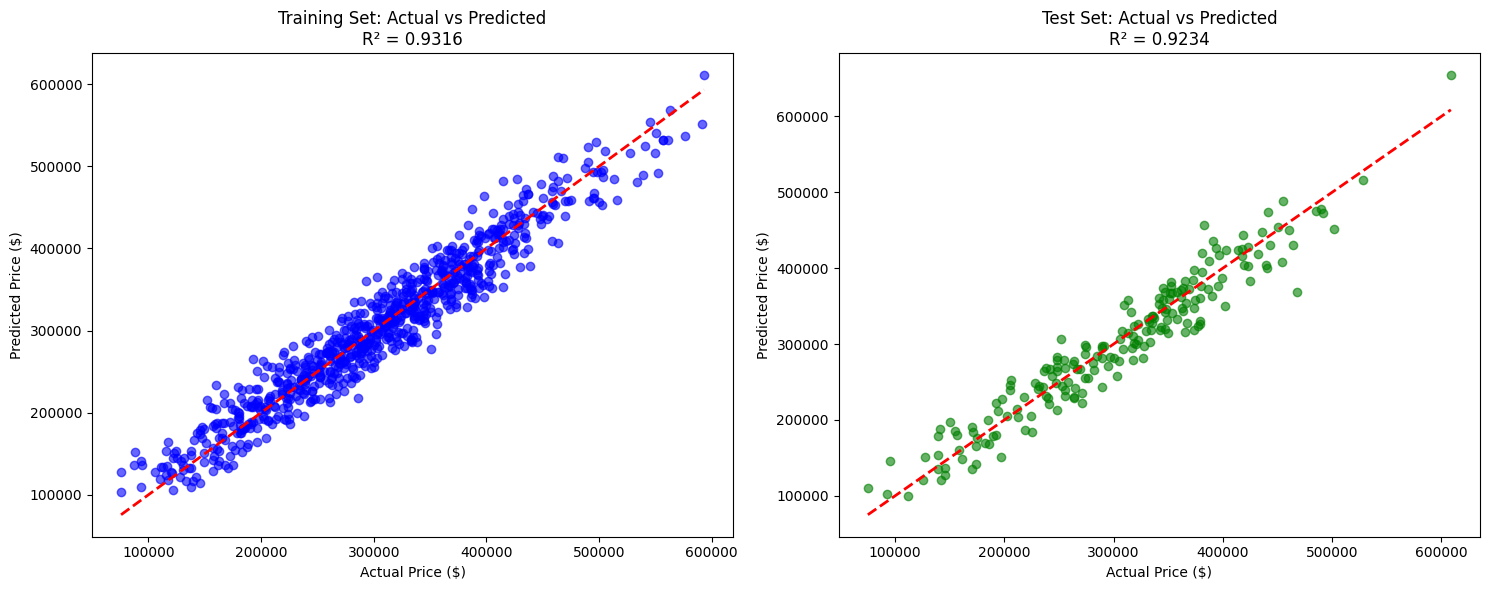


EXAMPLE PREDICTIONS
House: 1500 sqft, 3 bed, 2 bath → Predicted Price: $241,047.11
House: 2500 sqft, 4 bed, 3 bath → Predicted Price: $382,135.45
House: 1200 sqft, 2 bed, 1 bath → Predicted Price: $183,914.08
House: 3000 sqft, 5 bed, 4 bath → Predicted Price: $463,255.72

MODEL INTERPRETATION

The model suggests that:
• Each additional square foot adds approximately $119.94 to the house price
• Each additional bedroom adds approximately $14,630.24 to the house price
• Each additional bathroom adds approximately $6,521.93 to the house price
• The base price (intercept) is $4,208.25

Model Performance Summary:
• R² Score of 0.9234 indicates excellent model performance
• The model explains 92.3% of the variance in house prices
• Average prediction error is $21,402.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic house data
def generate_house_data(n_samples=1000):
    """Generate synthetic house data for demonstration"""

    # Generate features
    sqft = np.random.normal(2000, 800, n_samples)  # Square footage
    sqft = np.clip(sqft, 500, 5000)  # Reasonable range

    bedrooms = np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.2, 0.4, 0.25, 0.05])
    bathrooms = np.random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4], n_samples,
                                p=[0.15, 0.1, 0.3, 0.2, 0.15, 0.05, 0.05])

    # Create price with realistic relationships
    # Base price influenced by square footage, bedrooms, and bathrooms
    price = (sqft * 120 +  # $120 per sqft base
             bedrooms * 15000 +  # $15k per bedroom
             bathrooms * 8000 +  # $8k per bathroom
             np.random.normal(0, 25000, n_samples))  # Random noise

    # Ensure positive prices
    price = np.clip(price, 50000, 1000000)

    return pd.DataFrame({
        'sqft': sqft,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'price': price
    })

# Generate the dataset
print("Generating synthetic house data...")
df = generate_house_data(1000)

# Display basic information about the dataset
print("\nDataset Info:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Square footage vs Price
axes[0, 0].scatter(df['sqft'], df['price'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Square Footage')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Square Footage')

# Bedrooms vs Price
df.boxplot(column='price', by='bedrooms', ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Bedrooms')

# Bathrooms vs Price
df.boxplot(column='price', by='bathrooms', ax=axes[1, 0])
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Bathrooms')

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Prepare features (X) and target (y)
X = df[['sqft', 'bedrooms', 'bathrooms']]
y = df['price']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)

print(f"\nTraining Set Performance:")
print(f"  Mean Squared Error (MSE): ${train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${np.sqrt(train_mse):,.2f}")
print(f"  Mean Absolute Error (MAE): ${train_mae:,.2f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Set Performance:")
print(f"  Mean Squared Error (MSE): ${test_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${np.sqrt(test_mse):,.2f}")
print(f"  Mean Absolute Error (MAE): ${test_mae:,.2f}")
print(f"  R² Score: {test_r2:.4f}")

# Display model coefficients
print(f"\nModel Coefficients:")
feature_names = ['Square Footage', 'Bedrooms', 'Bathrooms']
for i, (feature, coef) in enumerate(zip(feature_names, model.coef_)):
    print(f"  {feature}: ${coef:,.2f}")
print(f"  Intercept: ${model.intercept_:,.2f}")

# Create prediction vs actual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Test set predictions
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Function to make predictions on new data
def predict_house_price(sqft, bedrooms, bathrooms):
    """Predict house price for given features"""
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]
    return prediction

# Example predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

examples = [
    (1500, 3, 2),
    (2500, 4, 3),
    (1200, 2, 1),
    (3000, 5, 4)
]

for sqft, bed, bath in examples:
    predicted_price = predict_house_price(sqft, bed, bath)
    print(f"House: {sqft} sqft, {bed} bed, {bath} bath → Predicted Price: ${predicted_price:,.2f}")

# Model interpretation
print(f"\n" + "="*50)
print("MODEL INTERPRETATION")
print("="*50)

print(f"\nThe model suggests that:")
print(f"• Each additional square foot adds approximately ${model.coef_[0]:.2f} to the house price")
print(f"• Each additional bedroom adds approximately ${model.coef_[1]:,.2f} to the house price")
print(f"• Each additional bathroom adds approximately ${model.coef_[2]:,.2f} to the house price")
print(f"• The base price (intercept) is ${model.intercept_:,.2f}")

print(f"\nModel Performance Summary:")
if test_r2 > 0.8:
    performance = "Excellent"
elif test_r2 > 0.6:
    performance = "Good"
elif test_r2 > 0.4:
    performance = "Fair"
else:
    performance = "Poor"

print(f"• R² Score of {test_r2:.4f} indicates {performance.lower()} model performance")
print(f"• The model explains {test_r2*100:.1f}% of the variance in house prices")
print(f"• Average prediction error is ${test_mae:,.2f}")